# **–ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∞—è ‚Ññ11. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥—ã –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è**

# **–ó–∞–¥–∞–Ω–∏–µ:**






## 1. –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å –±–∏–±–ª–∏–æ—Ç–µ–∫–∞–º–∏ –∏ –∏—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞—Ä–∏–µ–º
## 2. –í –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –í–∞–º–∏ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, –æ—Ç–±–µ—Ä–∏—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –æ–±—É—á–∏—Ç–µ –∏—Ö –Ω–∞ —Å–≤–æ–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ—Å–ª–µ —á–µ–≥–æ –ø—Ä–æ–≤–µ–¥–∏—Ç–µ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑.

## **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

–ò—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –¥–∞—Ç–∞—Å–µ—Ç https://zenodo.org/records/5146275


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Conv1D, Flatten

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [2]:
filename = "metr-la.csv"
df = pd.read_csv(filename, index_col=0, parse_dates=True)
df = df.sort_index()
sensor_id = '773869'
df = df[[sensor_id]].dropna()

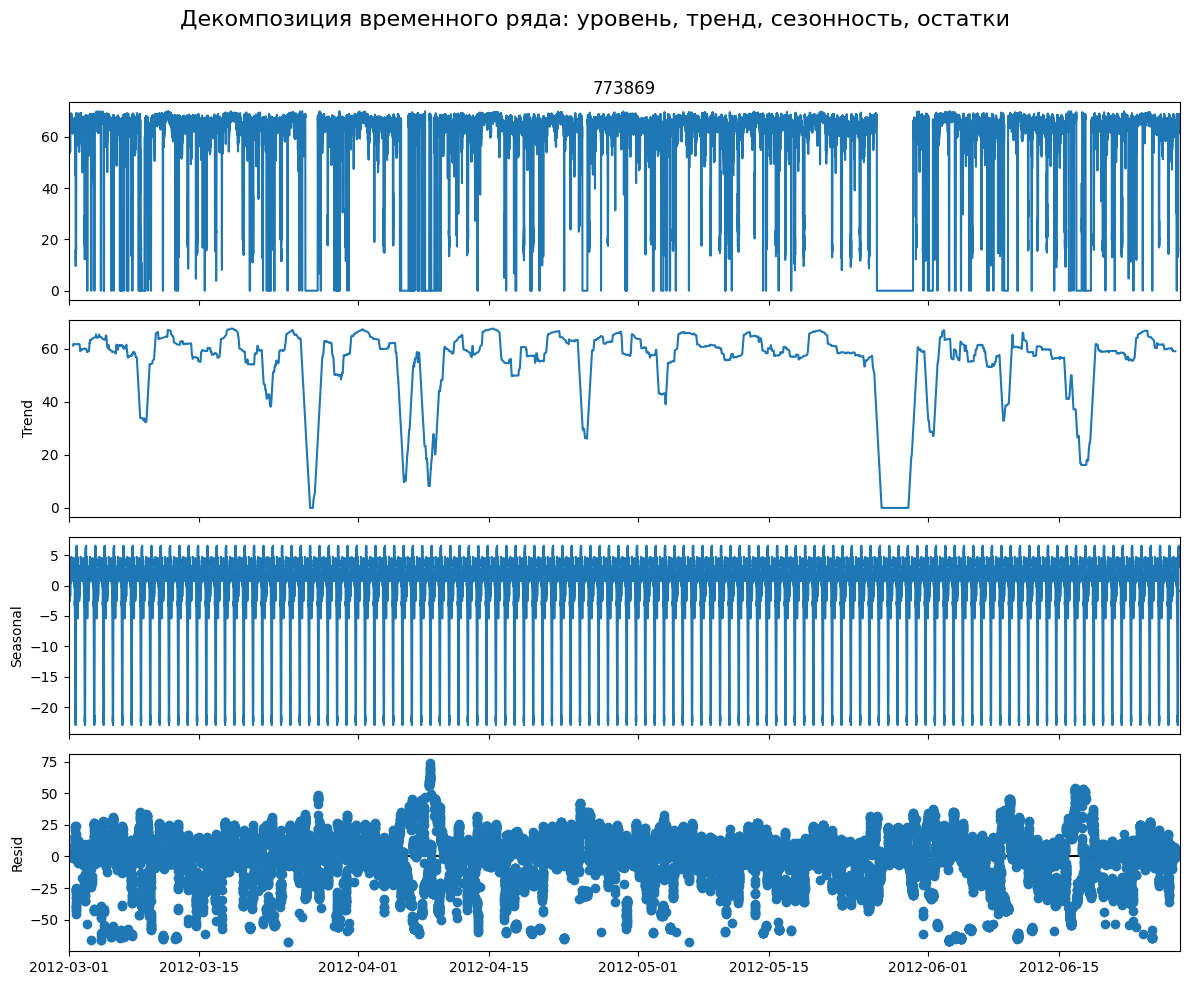

In [3]:
result = seasonal_decompose(df[sensor_id], model='additive', period=288)
fig = result.plot()
fig.set_size_inches(12, 10)
plt.suptitle("–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞: —É—Ä–æ–≤–µ–Ω—å, —Ç—Ä–µ–Ω–¥, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, –æ—Å—Ç–∞—Ç–∫–∏", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

look_back = 24
forecast_horizon = 1

X, Y = [], []
for i in range(len(data_scaled) - look_back - forecast_horizon):
    X.append(data_scaled[i:i + look_back])
    Y.append(data_scaled[i + look_back:i + look_back + forecast_horizon])
X, Y = np.array(X), np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, Y_train.shape)

(27397, 24, 1) (27397, 1, 1)


In [ ]:
metrics = {}

In [ ]:
# --- RNN ---
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, X_train.shape[2]), activation='tanh'))
model_rnn.add(Dense(X_train.shape[2]))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
history_rnn = model_rnn.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_rnn_train = model_rnn.predict(X_train)
pred_rnn = model_rnn.predict(X_test)
metrics['RNN'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_rnn.squeeze()))
print("RNN RMSE:", metrics['RNN'])

Epoch 1/50
857/857 - 2s - 3ms/step - loss: 0.0142 - val_loss: 0.0100
Epoch 2/50
857/857 - 2s - 2ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 3/50
857/857 - 2s - 2ms/step - loss: 0.0096 - val_loss: 0.0101
Epoch 4/50
857/857 - 2s - 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 5/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 6/50
857/857 - 2s - 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 7/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 8/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0098
Epoch 9/50
857/857 - 2s - 2ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 10/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 11/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 12/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 13/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 14/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 15/50
857/857 - 2s - 2m

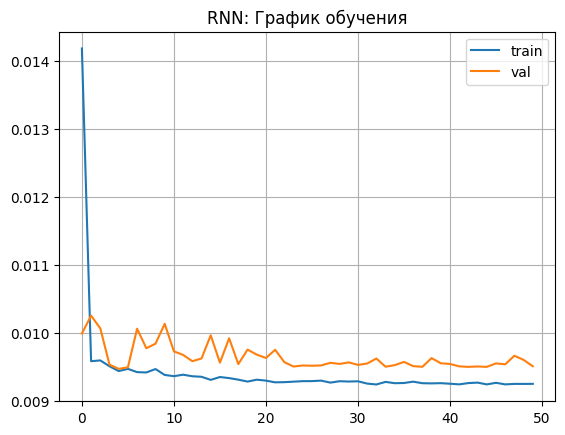

In [18]:
# RNN - –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è
plt.plot(history_rnn.history['loss'], label='train')
plt.plot(history_rnn.history['val_loss'], label='val')
plt.title("RNN: –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è")
plt.legend()
plt.grid(True)
plt.show()

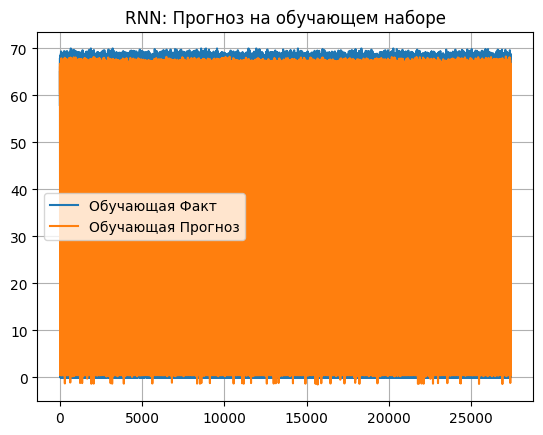

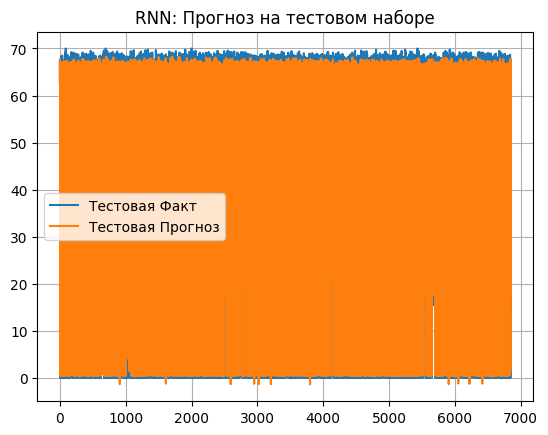

In [21]:
# RNN - –ü—Ä–æ–≥–Ω–æ–∑—ã
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_rnn_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("RNN: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_rnn.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("RNN: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- LSTM ---
model_lstm = Sequential()
model_lstm.add(LSTM(100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(X_train.shape[2]))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
history_lstm = model_lstm.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_lstm_train = model_lstm.predict(X_train)
pred_lstm = model_lstm.predict(X_test)
metrics['LSTM'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_lstm.squeeze()))
print("LSTM RMSE:", metrics['LSTM'])

Epoch 1/50
857/857 - 12s - 14ms/step - loss: 0.0202 - val_loss: 0.0112
Epoch 2/50
857/857 - 10s - 12ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 3/50
857/857 - 10s - 12ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 4/50
857/857 - 10s - 12ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 5/50
857/857 - 10s - 12ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/50
857/857 - 10s - 11ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 7/50
857/857 - 10s - 11ms/step - loss: 0.0096 - val_loss: 0.0098
Epoch 8/50
857/857 - 10s - 11ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 9/50
857/857 - 10s - 12ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 10/50
857/857 - 9s - 11ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 11/50
857/857 - 9s - 11ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 12/50
857/857 - 9s - 11ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 13/50
857/857 - 9s - 11ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 14/50
857/857 - 9s - 11ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 

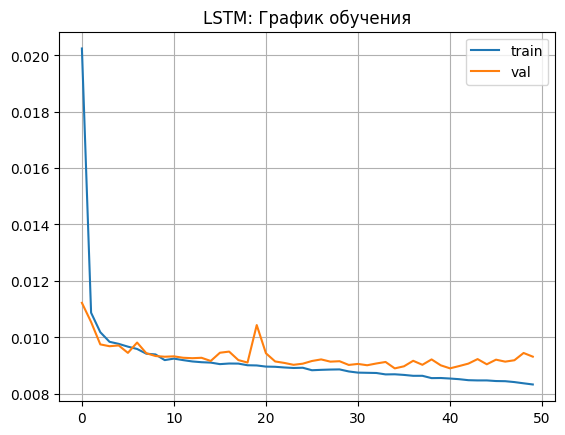

In [23]:
plt.plot(history_lstm.history['loss'], label='train'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(history_lstm.history['val_loss'], label='val'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("LSTM: –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

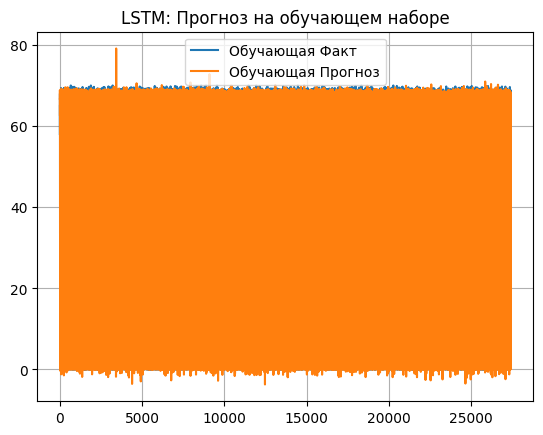

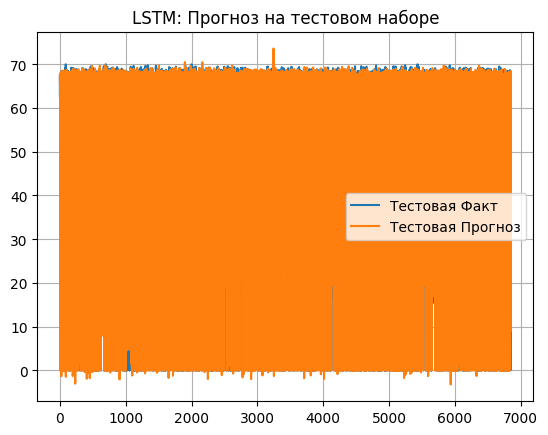

In [24]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_lstm_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("LSTM: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_lstm.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("LSTM: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- GRU ---
model_gru = Sequential()
model_gru.add(GRU(100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(25))
model_gru.add(Dense(X_train.shape[2]))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
history_gru = model_gru.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_gru_train = model_gru.predict(X_train)
pred_gru = model_gru.predict(X_test)
metrics['GRU'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_gru.squeeze()))
print("GRU RMSE:", metrics['GRU'])

Epoch 1/50
857/857 - 15s - 17ms/step - loss: 0.0177 - val_loss: 0.0102
Epoch 2/50
857/857 - 11s - 13ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 3/50
857/857 - 12s - 13ms/step - loss: 0.0102 - val_loss: 0.0106
Epoch 4/50
857/857 - 12s - 14ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 5/50
857/857 - 12s - 14ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 6/50
857/857 - 12s - 14ms/step - loss: 0.0097 - val_loss: 0.0103
Epoch 7/50
857/857 - 12s - 14ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 8/50
857/857 - 12s - 14ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 9/50
857/857 - 12s - 14ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/50
857/857 - 12s - 14ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 11/50
857/857 - 12s - 14ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 12/50
857/857 - 12s - 14ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 13/50
857/857 - 12s - 14ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 14/50
857/857 - 12s - 14ms/step - loss: 0.0093 - val_loss: 0.0095
E

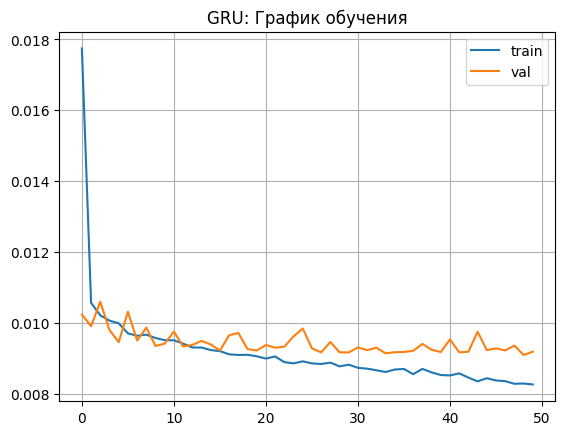

In [26]:
plt.plot(history_gru.history['loss'], label='train'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(history_gru.history['val_loss'], label='val'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("GRU: –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

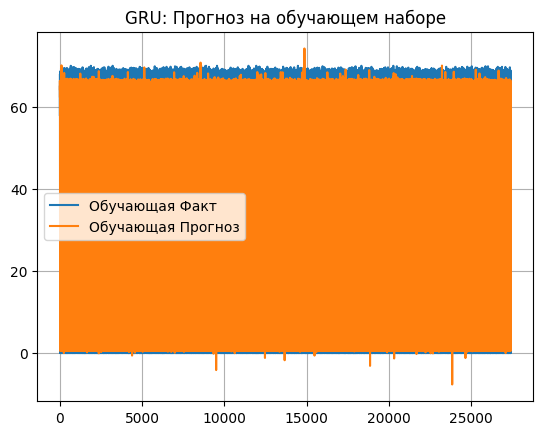

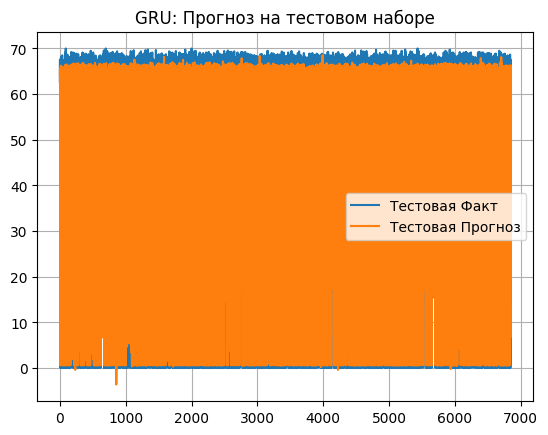

In [27]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_gru_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("GRU: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_gru.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("GRU: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- N-BEATS ---
model_nbeats = Sequential()
model_nbeats.add(Flatten(input_shape=(look_back, X_train.shape[2])))
model_nbeats.add(Dense(128, activation='relu'))
model_nbeats.add(Dense(128, activation='relu'))
model_nbeats.add(Dense(X_train.shape[2]))
model_nbeats.compile(loss='mean_squared_error', optimizer='adam')
history_nbeats = model_nbeats.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_nbeats_train = model_nbeats.predict(X_train)
pred_nbeats = model_nbeats.predict(X_test)
metrics['N-BEATS'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_nbeats.squeeze()))
print("N-BEATS RMSE:", metrics['N-BEATS'])

Epoch 1/50
857/857 - 1s - 2ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 2/50
857/857 - 1s - 863us/step - loss: 0.0099 - val_loss: 0.0098
Epoch 3/50
857/857 - 1s - 900us/step - loss: 0.0098 - val_loss: 0.0097
Epoch 4/50
857/857 - 1s - 885us/step - loss: 0.0095 - val_loss: 0.0096
Epoch 5/50
857/857 - 1s - 891us/step - loss: 0.0095 - val_loss: 0.0099
Epoch 6/50
857/857 - 1s - 874us/step - loss: 0.0094 - val_loss: 0.0105
Epoch 7/50
857/857 - 1s - 881us/step - loss: 0.0093 - val_loss: 0.0095
Epoch 8/50
857/857 - 1s - 879us/step - loss: 0.0092 - val_loss: 0.0094
Epoch 9/50
857/857 - 1s - 867us/step - loss: 0.0091 - val_loss: 0.0096
Epoch 10/50
857/857 - 1s - 872us/step - loss: 0.0091 - val_loss: 0.0095
Epoch 11/50
857/857 - 1s - 884us/step - loss: 0.0091 - val_loss: 0.0094
Epoch 12/50
857/857 - 1s - 867us/step - loss: 0.0089 - val_loss: 0.0100
Epoch 13/50
857/857 - 1s - 865us/step - loss: 0.0090 - val_loss: 0.0097
Epoch 14/50
857/857 - 1s - 853us/step - loss: 0.0089 - val_loss: 0.0095
Epo

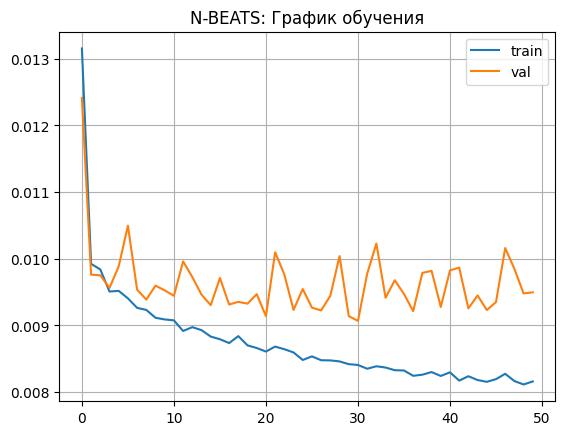

In [29]:
plt.plot(history_nbeats.history['loss'], label='train'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(history_nbeats.history['val_loss'], label='val'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("N-BEATS: –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

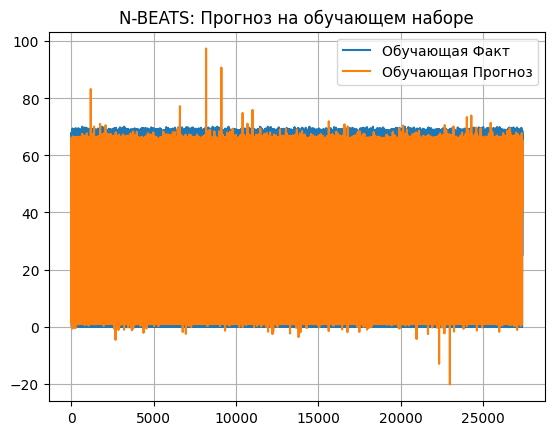

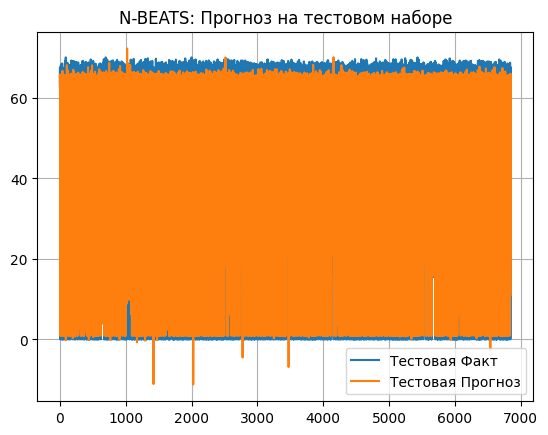

In [30]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_nbeats_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("N-BEATS: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_nbeats.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("N-BEATS: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- TCN ---
model_tcn = Sequential()
model_tcn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, X_train.shape[2])))
model_tcn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_tcn.add(Flatten())
model_tcn.add(Dense(50, activation='relu'))
model_tcn.add(Dense(X_train.shape[2]))
model_tcn.compile(loss='mean_squared_error', optimizer='adam')
history_tcn = model_tcn.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_tcn_train = model_tcn.predict(X_train)
pred_tcn = model_tcn.predict(X_test)
metrics['TCN'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_tcn.squeeze()))
print("TCN RMSE:", metrics['TCN'])

Epoch 1/50
857/857 - 2s - 3ms/step - loss: 0.0156 - val_loss: 0.0096
Epoch 2/50
857/857 - 1s - 2ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 3/50
857/857 - 1s - 2ms/step - loss: 0.0097 - val_loss: 0.0103
Epoch 4/50
857/857 - 1s - 2ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/50
857/857 - 1s - 2ms/step - loss: 0.0093 - val_loss: 0.0104
Epoch 6/50
857/857 - 1s - 2ms/step - loss: 0.0092 - val_loss: 0.0108
Epoch 7/50
857/857 - 1s - 2ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 8/50
857/857 - 1s - 2ms/step - loss: 0.0091 - val_loss: 0.0097
Epoch 9/50
857/857 - 1s - 2ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 10/50
857/857 - 1s - 2ms/step - loss: 0.0089 - val_loss: 0.0101
Epoch 11/50
857/857 - 1s - 2ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 12/50
857/857 - 1s - 2ms/step - loss: 0.0089 - val_loss: 0.0097
Epoch 13/50
857/857 - 1s - 2ms/step - loss: 0.0088 - val_loss: 0.0102
Epoch 14/50
857/857 - 1s - 2ms/step - loss: 0.0088 - val_loss: 0.0098
Epoch 15/50
857/857 - 1s - 2m

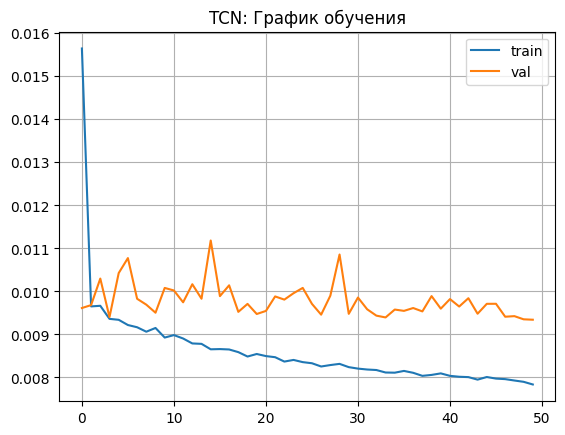

In [32]:
plt.plot(history_tcn.history['loss'], label='train'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(history_tcn.history['val_loss'], label='val'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("TCN: –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

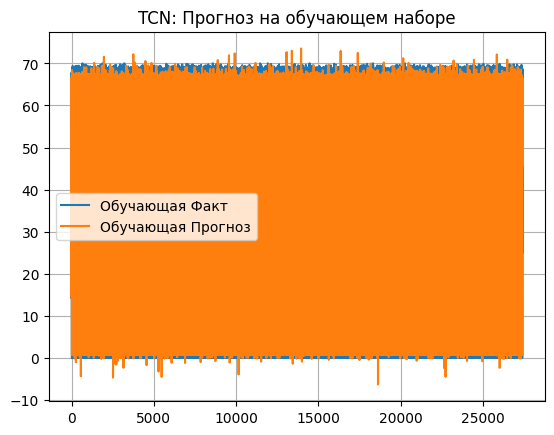

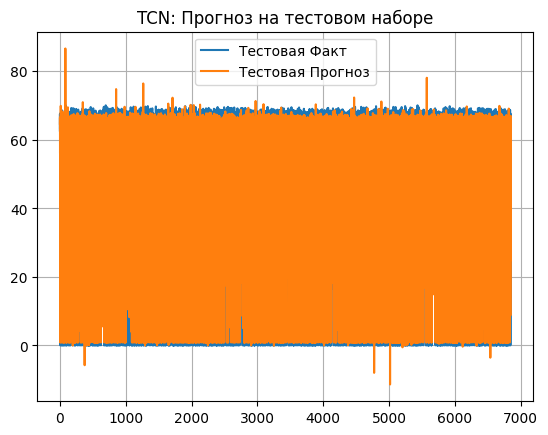

In [33]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_tcn_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("TCN: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.plot(scaler.inverse_transform(pred_tcn.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.title("TCN: –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ".replace('Train', '–û–±—É—á–∞—é—â–∞—è').replace('Test', '–¢–µ—Å—Ç–æ–≤–∞—è').replace('Actual', '–§–∞–∫—Ç').replace('Predict', '–ü—Ä–æ–≥–Ω–æ–∑'))
plt.legend()
plt.grid(True)
plt.show()


–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ RMSE:
             RMSE
RNN      0.097503
LSTM     0.096474
GRU      0.095828
N-BEATS  0.097434
TCN      0.096641


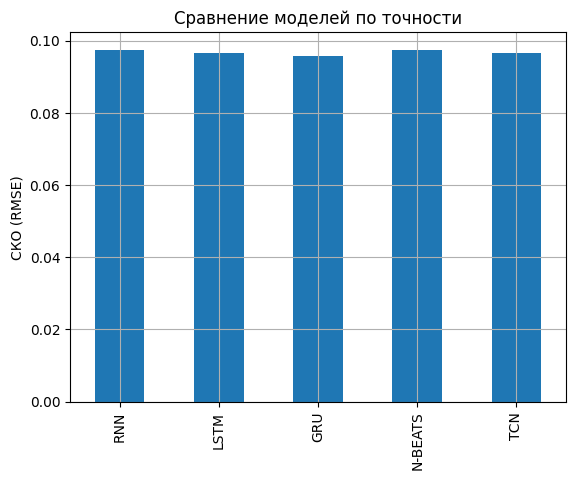

In [ ]:
# --- –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π ---
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['RMSE'])
print("\n–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ RMSE:")
print(metrics_df)

metrics_df.plot(kind='bar', legend=False)
plt.ylabel('–°–ö–û (RMSE)')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ —Ç–æ—á–Ω–æ—Å—Ç–∏')
plt.grid(True)
plt.show()

In [40]:
def predict_all_models(models_dict, df, timestamp_str):
    """
    –°–¥–µ–ª–∞—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ –ø–æ –≤—Å–µ–º –º–æ–¥–µ–ª—è–º –¥–ª—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏.
    """
    timestamp = pd.to_datetime(timestamp_str)
    index = df.index.get_loc(timestamp)

    if index < look_back:
        raise ValueError("–ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–¥ —ç—Ç–∏–º –≤—Ä–µ–º–µ–Ω–µ–º")

    last_sequence = df.iloc[index - look_back:index].values
    last_sequence_scaled = scaler.transform(last_sequence).reshape(1, look_back, -1)

    real_value = df.iloc[index].values[0] if index < len(df) else None

    results = []
    for name, model in models_dict.items():
        pred_scaled = model.predict(last_sequence_scaled)
        pred = scaler.inverse_transform(pred_scaled)[0][0]
        error = abs(pred - real_value) if real_value is not None else None
        results.append((name, round(pred, 2), round(real_value, 2) if real_value else None, round(error, 2) if error else None))

    results_df = pd.DataFrame(results, columns=["–ú–æ–¥–µ–ª—å", "–ü—Ä–æ–≥–Ω–æ–∑", "–§–∞–∫—Ç", "–û—à–∏–±–∫–∞"])
    print(f"\nüìÖ –í—Ä–µ–º—è: {timestamp_str}\n")

    return results_df


In [41]:
models_dict = {
    'RNN': model_rnn,
    'LSTM': model_lstm,
    'GRU': model_gru,
    'N-BEATS': model_nbeats,
    'TCN': model_tcn,
}

In [54]:
predict_all_models(models_dict, df, "2012-03-05 16:30:00")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step

üìÖ –í—Ä–µ–º—è: 2012-03-05 16:30:00



–ú–æ–¥–µ–ª—å    –ü—Ä–æ–≥–Ω–æ–∑   –§–∞–∫—Ç  –û—à–∏–±–∫–∞
0      RNN  65.029999  63.88    1.16
1     LSTM  64.919998  63.88    1.05
2      GRU  62.990002  63.88    0.89
3  N-BEATS  61.820000  63.88    2.05
4      TCN  61.549999  63.88    2.32

### üîö –í—ã–≤–æ–¥

–í —Ö–æ–¥–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–π —Ä–∞–±–æ—Ç—ã –±—ã–ª–∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω—ã –∏ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω—ã –ø—è—Ç—å –º–æ–¥–µ–ª–µ–π –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –∑–∞–¥–∞—á–∏ –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –¥–æ—Ä–æ–∂–Ω–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏ (—Å–∫–æ—Ä–æ—Å—Ç–∏ –¥–≤–∏–∂–µ–Ω–∏—è) –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ **METR-LA**. –í—Å–µ –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞–ª–∏—Å—å –Ω–∞ –æ–¥–Ω–æ–º –∏ —Ç–æ–º –∂–µ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–ª–∏—Å—å –ø–æ –º–µ—Ç—Ä–∏–∫–µ **RMSE** (—Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞).

#### üìä –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:

| –ú–æ–¥–µ–ª—å    | RMSE     |
|-----------|----------|
| RNN       | 0.097503 |
| LSTM      | 0.096474 |
| GRU       | 0.095828 |
| N-BEATS   | 0.097434 |
| TCN       | 0.096641 |

–ù–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å **GRU** —Å RMSE = **0.0958**, –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–≤ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥—Ä—É–≥–∏–º–∏ –ø–æ–¥—Ö–æ–¥–∞–º–∏. –ú–æ–¥–µ–ª—å **LSTM** –∑–∞–Ω—è–ª–∞ –≤—Ç–æ—Ä–æ–µ –º–µ—Å—Ç–æ (0.0965), –∞ **TCN** ‚Äî —Ç—Ä–µ—Ç—å–µ (0.0966). –ü—Ä–æ—Å—Ç–µ–π—à–∞—è –º–æ–¥–µ–ª—å **RNN** –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–º–µ–Ω—å—à—É—é —Ç–æ—á–Ω–æ—Å—Ç—å, —á—Ç–æ –æ–∂–∏–¥–∞–µ–º–æ –∏–∑-–∑–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫ –∑–∞–ø–æ–º–∏–Ω–∞–Ω–∏—é –¥–ª–∏–Ω–Ω—ã—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π. –°–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å **N-BEATS** –æ–∫–∞–∑–∞–ª–∞—Å—å –ª–∏—à—å –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ RNN, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∏ —Ä–∞–∑–º–µ—Ä–æ–º –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ **GRU** –∏ **LSTM** –æ–∫–∞–∑–∞–ª–∏—Å—å –Ω–∞–∏–±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º–∏ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –∏—Ö –ø—Ä–∏–≥–æ–¥–Ω–æ—Å—Ç—å –¥–ª—è –∑–∞–¥–∞—á –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤ —É—Å–ª–æ–≤–∏—è—Ö –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ —Ç—Ä–∞—Ñ–∏–∫–∞.
